# Wingspan Data Analysis

Read in the csv files with pandas and print the first couple of columns

In [66]:
import pandas as pd
import csv, os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

orig = pd.read_csv('orig_scores_plus_wins.csv', header=[0,1], index_col=0)
print(orig.iloc[:, :4])

Game               session 1 5/24/2020 game 1       5/24/2020 game 2      
Players                                  Matt Jenny             Matt Jenny
Birds                                      31    37               37    28
Bonus cards                                 9     0                9     6
End of round goals                         16    16               18    14
Eggs                                       13     3               21    16
Food on cards                               0     2                0     0
Tucked cards                                5     4                4     7
Total                                      74    62               89    71
Win                                         1     0                1     0
Loss                                        0     1                0     1
Draw                                        0     0                0     0


Average score components for winning games

In [7]:
orig_wins_only = orig.loc[:, orig.loc['Win']==1]
orig_win_mean = orig_wins_only.groupby(axis=1, level=1).mean().round(1)
orig_win_mean_bar = orig_win_mean.drop(['Total', 'Win', 'Loss', 'Draw'], axis=0)

print(orig_win_mean_bar)

Players             Jenny  Matt
Birds                35.7  33.0
Bonus cards           9.0   7.7
End of round goals   17.5  18.6
Eggs                 15.2  19.1
Food on cards         0.9   0.8
Tucked cards         11.3   6.6


Average score components for all games

In [8]:
orig_mean = orig.groupby(axis=1, level=1).mean().round(1)
orig_mean_bar = orig_mean.drop(['Total', 'Win', 'Loss', 'Draw'], axis=0)

print(orig_mean_bar)

Players             Aaron  Jenny  Margaux  Matt  Steve
Birds                39.0   32.8     32.0  35.3   30.0
Bonus cards          10.0    6.7      2.0   7.7    2.0
End of round goals    5.0   15.7     10.7  17.3    8.0
Eggs                  2.0   15.6     13.0  15.5   15.0
Food on cards         0.0    1.1      0.7   1.0   12.0
Tucked cards          6.0    9.5      5.0   6.2    9.0


Get a list of players and the number of games they've played (later used for xticklabels)

In [9]:
def players_game_count(df):
    players = sorted(list(df.columns.get_level_values(1).unique()))
    count = [list(df.columns.get_level_values(1)).count(p) for p in players]
    players_count = list(zip(players, count))
    return players_count

Plot the average score components for winning games and all games

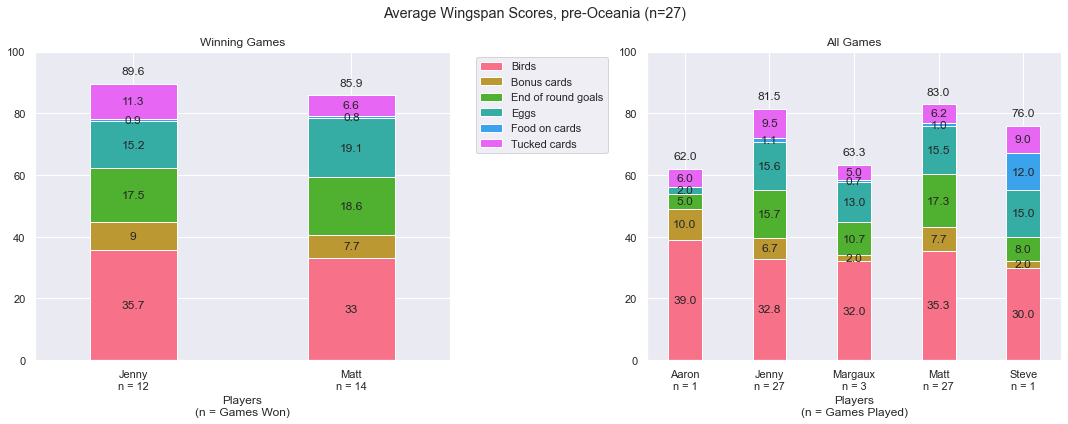

In [13]:
sns.set_theme(palette='husl')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

ax1 = orig_win_mean_bar.T.plot.bar(stacked=True, rot=0, width=0.4, ax=ax1, xlabel='Players\n(n = Games Won)')
for c in ax1.containers:
    ax1.bar_label(c, label_type='center')
for i, total in enumerate(orig_win_mean.loc['Total']):
    ax1.text(x=i, y=total+3, s=total, ha='center')
ax1.legend(bbox_to_anchor=(1.05, 1))
ax1.set_xticklabels([f'{i[0]}\nn = {i[1]}' for i in players_game_count(orig_wins_only)])
ax1.set_title('Winning Games')
ax1.set_ylim(top=100)

ax2 = orig_mean_bar.T.plot.bar(stacked=True, rot=0, width=0.4, ax=ax2, legend=False, xlabel='Players\n(n = Games Played)')
for c in ax2.containers:
    labels = [f'{h:.1f}' if (h := v.get_height()) > 0 else '' for v in c]
    ax2.bar_label(c, labels=labels, label_type='center')
for i, total in enumerate(orig_mean.loc['Total']):
    ax2.text(x=i, y=total+3, s=total, ha='center')
ax2.set_xticklabels([f'{i[0]}\nn = {i[1]}' for i in players_game_count(orig)])
ax2.set_title('All Games')
ax2.set_ylim(top=100)

plt.suptitle('Average Wingspan Scores, pre-Oceania (n=27)')    
plt.tight_layout()
plt.show()

Same workflow for the Oceania games

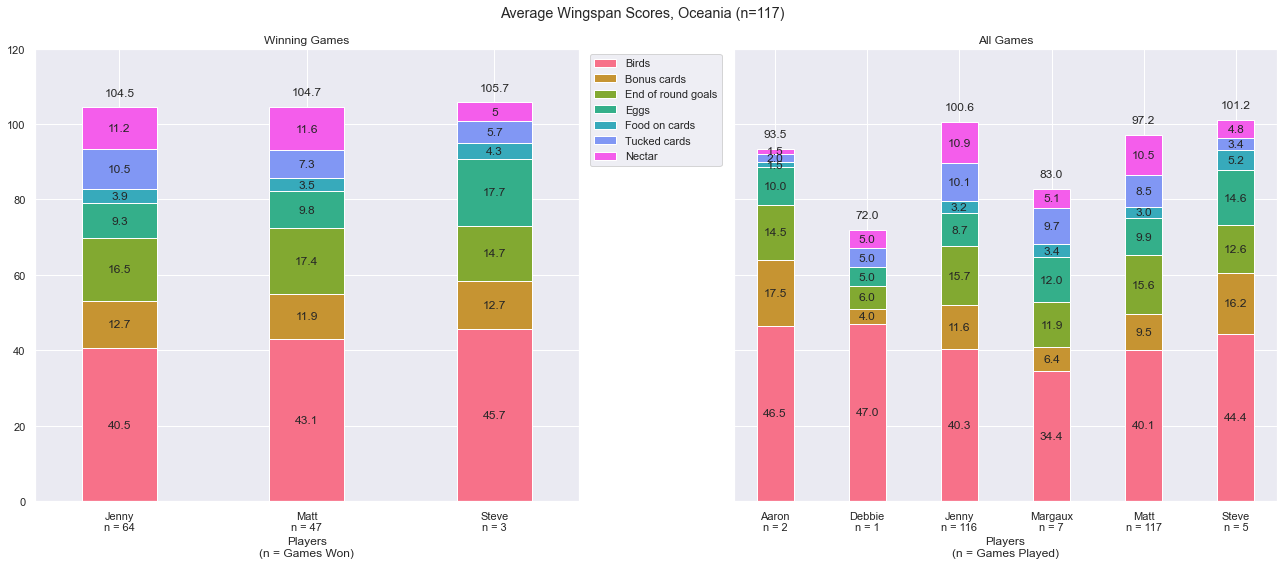

In [29]:
oceania = pd.read_csv('oceania_scores_plus_wins.csv', header=[0,1], index_col=0, skipfooter=2, engine='python')
#print(oceania)

oc_wins_only = oceania.loc[:, oceania.loc['Win']==1]
oc_win_mean = oc_wins_only.groupby(axis=1, level=1).mean().round(1)
oc_win_mean_bar = oc_win_mean.drop(['Total', 'Win', 'Loss', 'Draw'], axis=0)

oc_mean = oceania.groupby(axis=1, level=1).mean().round(1)
oc_mean_bar = oc_mean.drop(['Total', 'Win', 'Loss', 'Draw'], axis=0)

sns.set_theme()
sns.set_palette(palette='husl', n_colors=7)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,8), sharey=True)

ax1 = oc_win_mean_bar.T.plot.bar(stacked=True, rot=0, width=0.4, ax=ax1, xlabel='Players\n(n = Games Won)')
for c in ax1.containers:
    ax1.bar_label(c, label_type='center')
for i, total in enumerate(oc_win_mean.loc['Total']):
    ax1.text(x=i, y=total+3, s=total, ha='center')
ax1.legend(bbox_to_anchor=(1.01, 1))
ax1.set_xticklabels([f'{i[0]}\nn = {i[1]}' for i in players_game_count(oc_wins_only)])
ax1.set_title('Winning Games')
ax1.set_ylim(top=120)

ax2 = oc_mean_bar.T.plot.bar(stacked=True, rot=0, width=0.4, ax=ax2, legend=False, xlabel='Players\n(n = Games Played)')
for c in ax2.containers:
    labels = [f'{h:.1f}' if (h := v.get_height()) > 0 else '' for v in c]
    ax2.bar_label(c, labels=labels, label_type='center')
for i, total in enumerate(oc_mean.loc['Total']):
    ax2.text(x=i, y=total+3, s=total, ha='center')
ax2.set_xticklabels([f'{i[0]}\nn = {i[1]}' for i in players_game_count(oceania)])
ax2.set_title('All Games')

plt.suptitle(f'Average Wingspan Scores, Oceania (n={len(np.unique([c[0] for c in oceania.columns]))})')    
plt.tight_layout()
plt.show()

What is the frequency distribution of a player's score ranges?

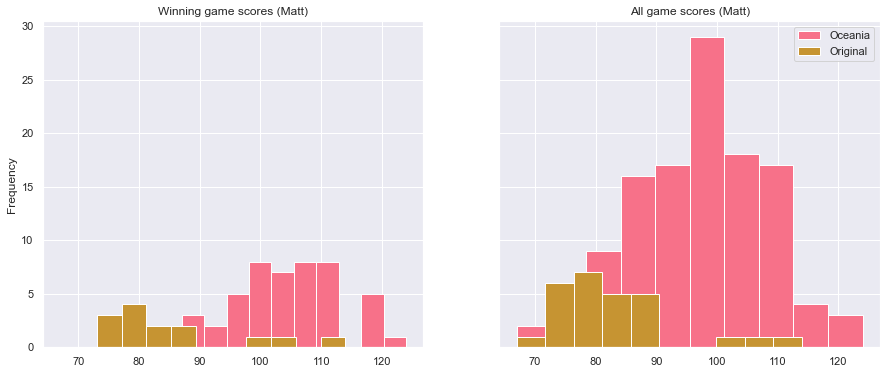

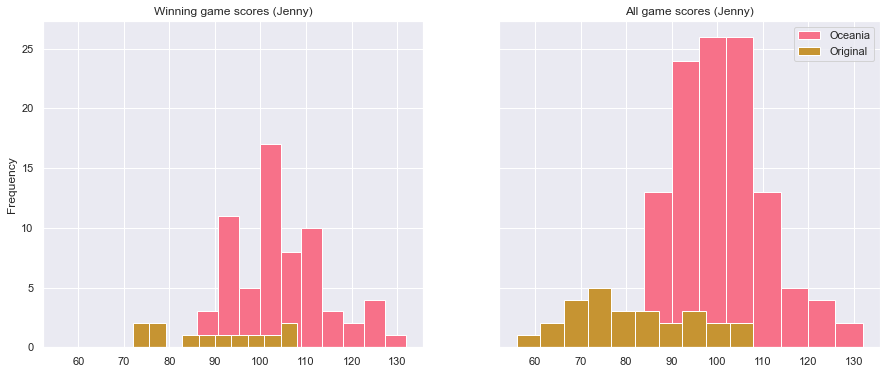

In [87]:
def score_freq_plot(player):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6), sharex=True, sharey=True)
    ax1 = oc_wins_only.loc['Total', (slice(None), player)].plot.hist(ax=ax1, title=f'Winning game scores ({player})', xlabel='Oceania')
    orig_wins_only.loc['Total', (slice(None), player)].plot.hist(ax=ax1)
    ax2 = oceania.loc['Total', (slice(None), player)].plot.hist(ax=ax2, title=f'All game scores ({player})')
    orig.loc['Total', (slice(None), player)].plot.hist(ax=ax2)
    plt.legend(['Oceania', 'Original'], loc=1)
    plt.show()
score_freq_plot('Matt')
score_freq_plot('Jenny')

Determine the difference between the highest score and the next-highest score, i.e. by how many points the game was won

In [56]:
oc_losses_only = oceania.loc[:, oceania.loc['Loss']==1]

loss_list = []
loss_games = oc_losses_only.columns.get_level_values(0).unique()
for g in loss_games:
    loss_list.append(oc_wins_only.loc['Total', g].max() - oc_losses_only.loc['Total', g].max())
loss_diff = pd.DataFrame(data=loss_list, index=oc_wins_only.columns, columns=['Difference'])
print(loss_diff)

oc_win_diff = pd.concat([oc_wins_only, loss_diff.T])
print(oc_win_diff.groupby(level=1, axis=1).mean().drop(['Win', 'Loss', 'Draw']))

                                      Difference
Game                         Players            
Copy of 12/11/20 (oceania 1) Matt            5.0
1/3/21                       Steve          11.0
1/15/21                      Matt            5.0
1/16/21 game 2               Jenny          11.0
1/19/21                      Steve           1.0
...                                          ...
9/17/21, 9:35 PM             Jenny           9.0
9/19/21, 4:04 PM             Jenny           3.0
9/25/21, 3:20 PM             Jenny           1.0
9/25/21, 8:03 PM             Jenny          17.0
10/17/21, 5:02 PM            Matt            7.0

[114 rows x 1 columns]
Players                  Jenny        Matt       Steve
Birds                40.515625   43.085106   45.666667
Bonus cards          12.656250   11.936170   12.666667
End of round goals   16.468750   17.446809   14.666667
Eggs                  9.296875    9.787234   17.666667
Food on cards         3.875000    3.510638    4.333333
Tucked ca

What percent of games did each player win?

In [57]:
oc_wld_group = oceania_wld.loc['Win'].groupby(level=1).agg([np.sum, np.size])
oc_wld_group['W%'] = (oc_wld_group['sum']/oc_wld_group['size']).round(2)
print(oc_wld_group)

          sum   size    W%
Players                   
Aaron     0.0    2.0  0.00
Debbie    0.0    1.0  0.00
Jenny    64.0  116.0  0.55
Margaux   0.0    7.0  0.00
Matt     47.0  117.0  0.40
Steve     3.0    5.0  0.60


What is the correlation between the score components and total score for winning games?

Total                 1.000000
Bonus cards           0.522202
Birds                 0.477432
Eggs                  0.221645
End of round goals    0.212895
Tucked cards          0.168751
Food on cards         0.109200
Nectar                0.037128
Name: Total, dtype: float64


<AxesSubplot:>

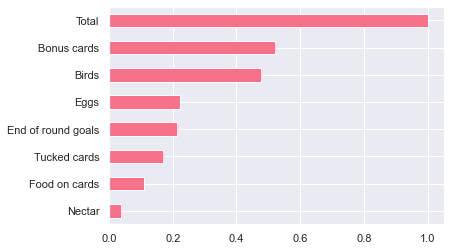

In [53]:
print(oc_wins_only.drop(['Win', 'Loss', 'Draw'], axis=0).T.corr()['Total'].sort_values(ascending=False))
oc_wins_only.drop(['Win', 'Loss', 'Draw'], axis=0).T.corr()['Total'].sort_values().plot.barh()

All games?

Total                 1.000000
Bonus cards           0.554991
Birds                 0.514812
End of round goals    0.401855
Nectar                0.274414
Eggs                  0.198456
Food on cards         0.091264
Tucked cards          0.078893
Name: Total, dtype: float64


<AxesSubplot:>

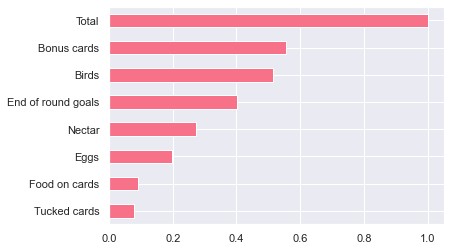

In [55]:
print(oceania.drop(['Win', 'Loss', 'Draw'], axis=0).T.corr()['Total'].sort_values(ascending=False))
oceania.drop(['Win', 'Loss', 'Draw'], axis=0).T.corr()['Total'].sort_values().plot.barh()